### Imports

In [1]:
import sys
mypath = "/home/basia/Documents/spectroscopy/magnetstein"
sys.path.insert(0, mypath)

In [2]:
import numpy as np
import pandas as pd
import os
from masserstein import NMRSpectrum, estimate_proportions
import matplotlib.pyplot as plt
import pulp
import pickle

### Data

In [3]:
experiment_name = 'PMG 284 monitoring'

In [8]:
mixture_path = '../../data/PMG_284/seria1.csv'

reagents_path = '../../data/PMG_284/widmo0.csv'

mixture_separator = '\t'

reagents_separator = '\t'

data_path = '../../data/PMG_284/'

#### Mixture in time

In [14]:
mixture_time_data = pd.read_csv(mixture_path, sep = mixture_separator).iloc[:,:-1]

In [18]:
mixture_time_data

,ppm,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t991,t992,t993,t994,t995,t996,t997,t998,t999,t1000
0,0.000095,0.000162,-0.000244,0.000299,0.000668,0.000364,-0.000021,0.000714,0.000363,-0.000380,...,0.000109,-3.164280e-05,0.001029,0.000088,3.807970e-04,0.000326,0.000619,0.000180,0.000299,0.000362
1,0.000217,0.000112,-0.000031,0.000247,0.000716,0.000262,-0.000005,0.000816,0.000424,-0.000323,...,-0.000089,-5.876040e-05,0.001067,0.000101,3.119680e-04,0.000327,0.000821,-0.000022,0.000151,0.000589
2,0.000338,0.000037,0.000064,0.000235,0.000695,0.000298,0.000035,0.000613,0.000296,-0.000229,...,0.000044,7.600290e-06,0.001078,0.000135,2.413690e-04,0.000361,0.000795,-0.000087,-0.000019,0.000629
3,0.000460,-0.000037,-0.000099,0.000224,0.000516,0.000335,0.000075,0.000409,0.000168,-0.000135,...,0.000176,7.396100e-05,0.001090,0.000169,1.707700e-04,0.000396,0.000769,0.000187,-0.000188,0.000328
4,0.000581,-0.000020,-0.000189,0.000213,0.000346,0.000281,0.000116,0.000467,0.000197,-0.000207,...,0.000057,-7.774220e-07,0.001101,0.000137,1.001710e-04,0.000345,0.000669,0.000306,-0.000176,0.000017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49321,5.999480,0.000014,-0.000728,-0.000072,-0.000007,-0.000187,-0.000404,-0.000318,-0.000527,-0.000476,...,-0.000339,-1.443020e-04,0.000613,-0.000108,-5.259360e-07,0.000107,0.000113,0.000008,0.000382,-0.000002
49322,5.999600,0.000171,-0.000638,-0.000048,0.000183,-0.000141,-0.000458,-0.000251,-0.000225,-0.000251,...,-0.000003,1.528880e-04,0.000644,0.000061,-7.621520e-05,0.000536,0.000473,-0.000015,0.000350,0.000219
49323,5.999720,0.001375,0.000396,0.000714,0.001542,0.001230,0.000553,0.000848,0.001206,0.000903,...,0.001013,1.691750e-03,0.001920,0.001019,1.037880e-03,0.001932,0.001850,0.000753,0.001286,0.001464
49324,5.999850,0.002204,0.001431,0.001436,0.002435,0.002123,0.001386,0.001772,0.002091,0.001779,...,0.001611,2.609780e-03,0.002885,0.001850,2.020950e-03,0.002678,0.002578,0.001645,0.002210,0.002325


In [16]:
names = ['ppm'] + ['t' + str(nb) for nb in range(1, mixture_time_data.shape[1])]

In [17]:
mixture_time_data.columns = names

In [19]:
def load_spectrum(mixture_time_data, moment_of_time):
    ppm = mixture_time_data['ppm']
    intensity = mixture_time_data['t'+str(moment_of_time)]
    sp = NMRSpectrum(confs = list(zip(ppm, intensity)))
    return sp

In [20]:
%matplotlib notebook

<IPython.core.display.Javascript object>


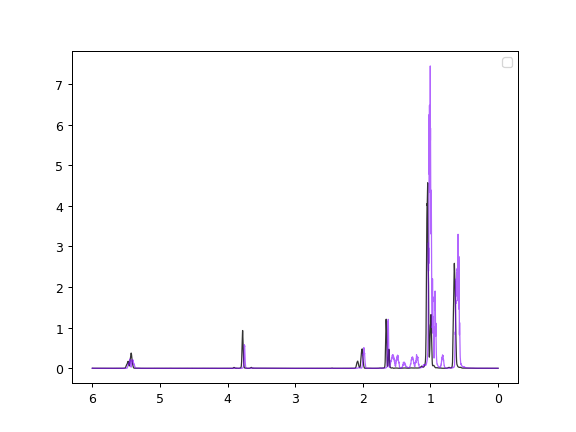

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [21]:
plt.gca().invert_xaxis()
NMRSpectrum.plot_all([load_spectrum(mixture_time_data, 1),
                     load_spectrum(mixture_time_data, 1000)], profile=True)

#### Reagents

In [22]:
reagent = pd.read_csv(reagents_path, sep=reagents_separator, header=None).iloc[:,:2]

In [23]:
reagent

,0,1
0,0.000095,-0.008444
1,0.000217,-0.008162
2,0.000338,-0.007936
3,0.000460,-0.007966
4,0.000581,-0.008122
...,...,...
49321,5.999480,-0.014917
49322,5.999600,-0.014586
49323,5.999720,-0.013315
49324,5.999850,-0.012727


<IPython.core.display.Javascript object>


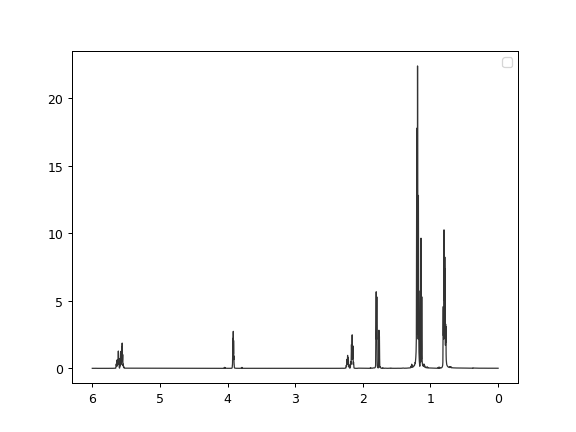

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [27]:
ppm = reagent.iloc[:,0]
ints = reagent.iloc[:,1]
reagent_sp = NMRSpectrum(confs = list(zip(ppm, ints)))
plt.gca().invert_xaxis()
NMRSpectrum.plot_all([reagent_sp], profile=True)
#NMRSpectrum.plot_all([reagent_sp, load_spectrum(mixture_time_data, 1)], profile=True)

In [30]:
substrat0 = reagent[reagent[0].apply(lambda x: (x> 1 and x<1.157) or (x>1.5 and x<2.4) or (x>5.4 and x<5.8))]
substrat1 = reagent[reagent[0].apply(lambda x: (x>0.65 and x<0.9) or (x>1.157 and x<1.35) or (x>3.6 and x<4.2))]

<IPython.core.display.Javascript object>


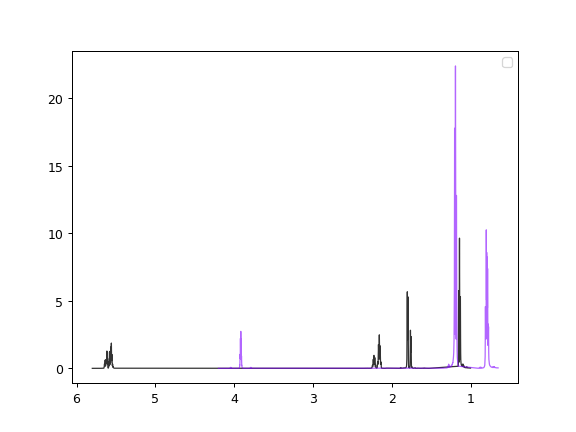

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [31]:
ppm = substrat0.iloc[:,0]
ints = substrat0.iloc[:,1]
sp0_sp = NMRSpectrum(confs = list(zip(ppm, ints)))
ppm = substrat1.iloc[:,0]
ints = substrat1.iloc[:,1]
sp1_sp = NMRSpectrum(confs = list(zip(ppm, ints)))
#mix1 = load_spectrum(mixture_time_data, 1)
plt.gca().invert_xaxis()
NMRSpectrum.plot_all([sp0_sp, sp1_sp], profile=True)

### Saving preprocessed spectra

In [33]:
np.savetxt(data_path + 'preprocessed_substrate0.csv', substrat0, delimiter = '\t')
np.savetxt(data_path + 'preprocessed_substrate1.csv', substrat1, delimiter = '\t')